In [97]:
# !pip install tensorflow
# import libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random
import matplotlib.pyplot as plt

In [98]:
# open json file
data_file = open('/content/drive/MyDrive/PhysicsBuddy/data.json').read()
data = json.loads(data_file)

# download required package
lemmatizer = WordNetLemmatizer()
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('stopwords')

# stop words for english like he,a,the,an,was
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
# classes are unique ids and document contains question words with ids like [((newton, first, law),1)]
words = []
classes = []
documents = []
for row in data['data']:
  question = row['question']

  #tokenize each word, remove stop words and lemmatize word
  w = nltk.word_tokenize(question)
  w = [i.lower() for i in w if not i.lower() in stop_words]
  w = [lemmatizer.lemmatize(i) for i in w]
  words.extend(w)

  documents.append((w,row['id']))
  classes.append(row['id'])

In [100]:
# remove duplicates
words = sorted(list(set(words)))

# sort classes
classes = sorted(list(set(classes)))

# documents = [(['science'], 1)]
print(len(documents), "documents")

# classes = unique ids
print(len(classes), "classes", classes)

# words = all words, vocabulary
print(len(words), "unique lemmatized words", words)

# dump words and classes
pickle.dump(words,open('/content/drive/MyDrive/PhysicsBuddy/words.pkl','wb'))
pickle.dump(classes,open('/content/drive/MyDrive/PhysicsBuddy/classes.pkl','wb'))

253 documents
253 classes [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 2

In [101]:
# create our training data
training = []

# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each question
for doc in documents:

  # initialize our bag of words
  bag = []

  # list of tokenized words for the pattern
  pattern_words = doc[0]

  # create our bag of words array with 1, if word match found in current pattern
  for w in words:
    bag.append(1) if w in pattern_words else bag.append(0)

  # output is a '0' for each tag and '1' for current tag (for each pattern)
  output_row = list(output_empty)
  output_row[classes.index(doc[1])] = 1
  training.append([bag, output_row])

# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists. X - patterns, Y - classes
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


<ipython-input-101-24bff98e6c66>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [102]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of classes to predict output class with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=500, batch_size=5, verbose=1)
model.save('/content/drive/MyDrive/PhysicsBuddy/chatbot_model.h5', hist)
print("model created")

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/500
51/51 [==============================] - 1s 2ms/step - loss: 5.5516 - accuracy: 0.0079
Epoch 2/500
51/51 [==============================] - 0s 2ms/step - loss: 5.5368 - accuracy: 0.0040
Epoch 3/500
51/51 [==============================] - 0s 2ms/step - loss: 5.5318 - accuracy: 0.0119
Epoch 4/500
51/51 [==============================] - 0s 2ms/step - loss: 5.5370 - accuracy: 0.0000e+00
Epoch 5/500
51/51 [==============================] - 0s 2ms/step - loss: 5.5142 - accuracy: 0.0040
Epoch 6/500
51/51 [==============================] - 0s 2ms/step - loss: 5.5211 - accuracy: 0.0158
Epoch 7/500
51/51 [==============================] - 0s 2ms/step - loss: 5.5083 - accuracy: 0.0000e+00
Epoch 8/500
51/51 [==============================] - 0s 2ms/step - loss: 5.4866 - accuracy: 0.0198
Epoch 9/500
51/51 [==============================] - 0s 2ms/step - loss: 5.4870 - accuracy: 0.0158
Epoch 10/500
51/51 [==============================] - 0s 2ms/step - loss: 5.4548 - accuracy: 0.0316
E

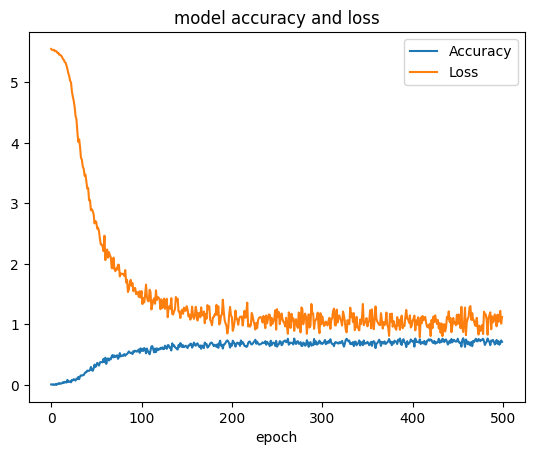

In [103]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('model accuracy and loss')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper right')
plt.show()